<a href="https://www.kaggle.com/code/chriszhengao/alzheimer-s-disease-prediction-ensemble-test?scriptVersionId=151002806" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/handwriting-data-to-detect-alzheimers-disease/data.csv")

<Axes: xlabel='class', ylabel='count'>

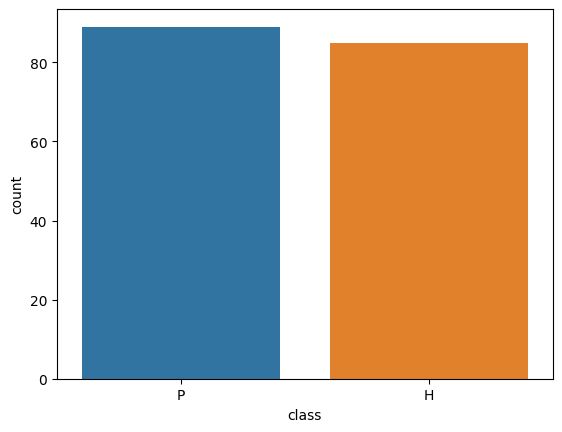

In [3]:
plt.figure()
sns.countplot(x = "class", data=df)

In [4]:
df.sample(5)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
155,id_156,1260,0.000008,339.614859,186.696258,1559,6988,0.204238,0.167571,263.155559,...,0.110914,0.018600,2.949977,2.481760,100,63430,1884.644490,155557.5280,117435,H
144,id_145,5975,0.000005,468.028309,254.541305,1443,6013,2.772566,0.170472,361.284807,...,0.107756,0.020231,4.298868,2.999059,72,30395,1727.875637,187862.8199,50730,H
11,id_12,1970,0.000011,231.499777,90.649480,1434,5643,0.209560,0.144054,161.074629,...,0.063367,0.017974,2.022657,1.528793,104,71795,912.940525,145022.1189,182355,P
26,id_27,3365,0.000006,139.705985,179.776831,1777,6415,0.206496,0.208559,159.741408,...,0.064161,0.020781,1.809954,2.213869,180,74185,1632.469098,352981.8500,238895,P
42,id_43,1370,0.000007,377.251255,322.546230,1718,8347,0.218833,0.264510,349.898743,...,0.069642,0.016373,2.763884,1.524188,114,69070,1381.940785,147169.1335,144775,P


In [5]:
null_= pd.DataFrame(df.isna().sum())
sum(null_)

0

In [6]:
df.select_dtypes("O").values[:5]

array([['id_1', 'P'],
       ['id_2', 'P'],
       ['id_3', 'P'],
       ['id_4', 'P'],
       ['id_5', 'P']], dtype=object)

In [7]:
y = df['class']

X = df.drop(['class', 'ID'], axis=1)

X.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 450)
(53, 450)
(121,)
(53,)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("RF Accuracy:", rf_accuracy)

RF Accuracy: 0.8490566037735849


In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print("LR Accuracy:",lr_accuracy)

LR Accuracy: 0.8301886792452831


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test,dt_pred)
print("DT Accuracy:", dt_accuracy)

DT Accuracy: 0.7547169811320755


In [12]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.49056603773584906


GridSeachCV

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear']  
}

In [14]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

In [15]:
grid_search.fit(X_train, y_train)
print("Best:", grid_search.best_params_)

Best: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("LR2 Accuracy", accuracy)

print("Report:")
print(classification_report(y_test, y_pred))

LR2 Accuracy 0.7924528301886793
Report:
              precision    recall  f1-score   support

           H       0.81      0.79      0.80        28
           P       0.77      0.80      0.78        25

    accuracy                           0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.79      0.79      0.79        53



In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)

print("GB accuracy", accuracy)

GB accuracy 0.7924528301886793


In [18]:
features = X.columns.tolist()

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the feature importance rank
print("Feature importance rank:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

Feature importance rank:
total_time23: 0.042969
air_time23: 0.036143
total_time17: 0.029921
air_time5: 0.0264726
total_time15: 0.0231863
air_time15: 0.0217196
num_of_pendown19: 0.0165177
paper_time9: 0.0161158
mean_gmrt17: 0.0153054
air_time7: 0.0130471
paper_time8: 0.0129891
paper_time23: 0.0125765
total_time7: 0.0123702
total_time3: 0.01216
paper_time22: 0.0121384
total_time6: 0.0120064
pressure_mean5: 0.0107805
air_time6: 0.0101113
air_time11: 0.0100361
paper_time17: 0.0095818
pressure_var5: 0.0095145
total_time12: 0.0089902
total_time22: 0.0089898
air_time17: 0.0086182
total_time16: 0.0084864
gmrt_in_air17: 0.0080129
air_time13: 0.0078074
pressure_var19: 0.0075158
mean_gmrt12: 0.0070365
pressure_mean19: 0.0067948
total_time5: 0.0067339
mean_jerk_on_paper5: 0.0066062
paper_time3: 0.0064868
paper_time12: 0.0064797
air_time16: 0.0064015
mean_speed_in_air23: 0.006187
total_time13: 0.0061796
disp_index9: 0.0060538
air_time22: 0.0059478
mean_gmrt15: 0.0057379
mean_gmrt14: 0.0056274
mean_

Try Voting

In [19]:
from sklearn.ensemble import VotingClassifier

In [20]:
voting_classifier = VotingClassifier(estimators=[
    ('logistic', lr),
    ('random_forest', rf)
], voting='hard')

voting_classifier.fit(X_train, y_train)
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Hard Voting：{accuracy}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Hard Voting：0.8867924528301887


Stacking

In [21]:
from sklearn.ensemble import StackingClassifier

In [22]:
stacked_classifier = StackingClassifier(estimators=[
    ('random_forest', rf),
    ('logistic', lr)
], final_estimator=LogisticRegression())

stacked_classifier.fit(X_train, y_train)

y_pred = stacked_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking：{accuracy}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Stacking：0.8867924528301887


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
